In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-10-14 05:29:48--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.134, 13.200.41.135, 13.200.41.136, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.6s    

2025-10-14 05:29:57 (15.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


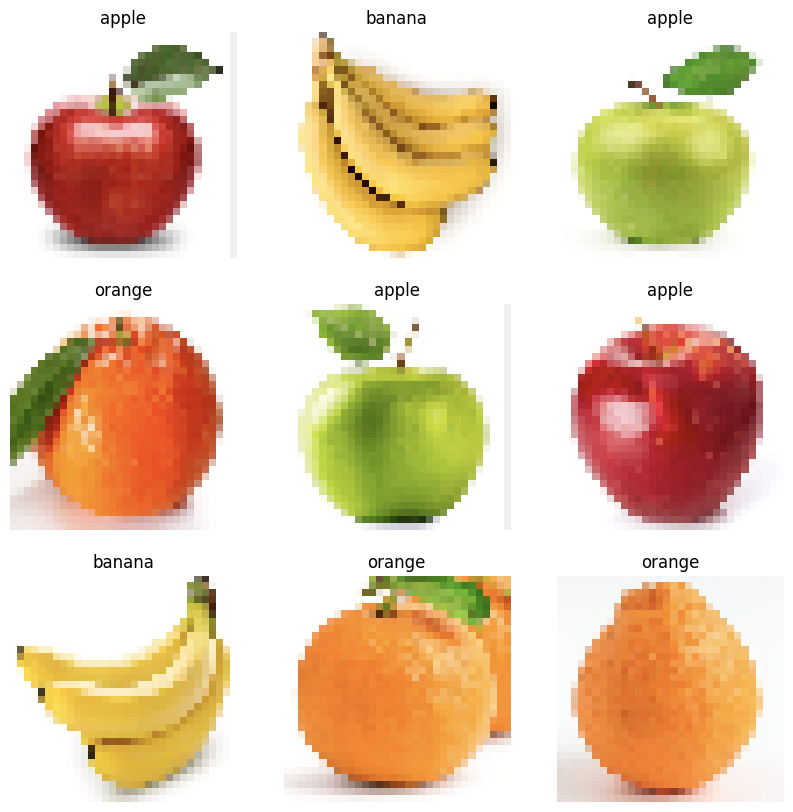

In [ ]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="softmax"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.3679 - loss: 1.0981 - val_accuracy: 0.3485 - val_loss: 1.0868
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4548 - loss: 1.0857 - val_accuracy: 0.5455 - val_loss: 1.0423
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5427 - loss: 1.0386 - val_accuracy: 0.5455 - val_loss: 0.9964
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5643 - loss: 1.0013 - val_accuracy: 0.5303 - val_loss: 0.9849
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5897 - loss: 0.9788 - val_accuracy: 0.6364 - val_loss: 0.9587
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6931 - loss: 0.9529 - val_accuracy: 0.7273 - val_loss: 0.9317
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7387 - loss: 0.9303 - val_accuracy: 0.6212 - val_loss: 0.9665
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.7642 - loss: 0.9175 - val_accuracy: 0.6970 - 

In [ ]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.9196 - loss: 0.6225


[0.6290715932846069, 0.9153845906257629]

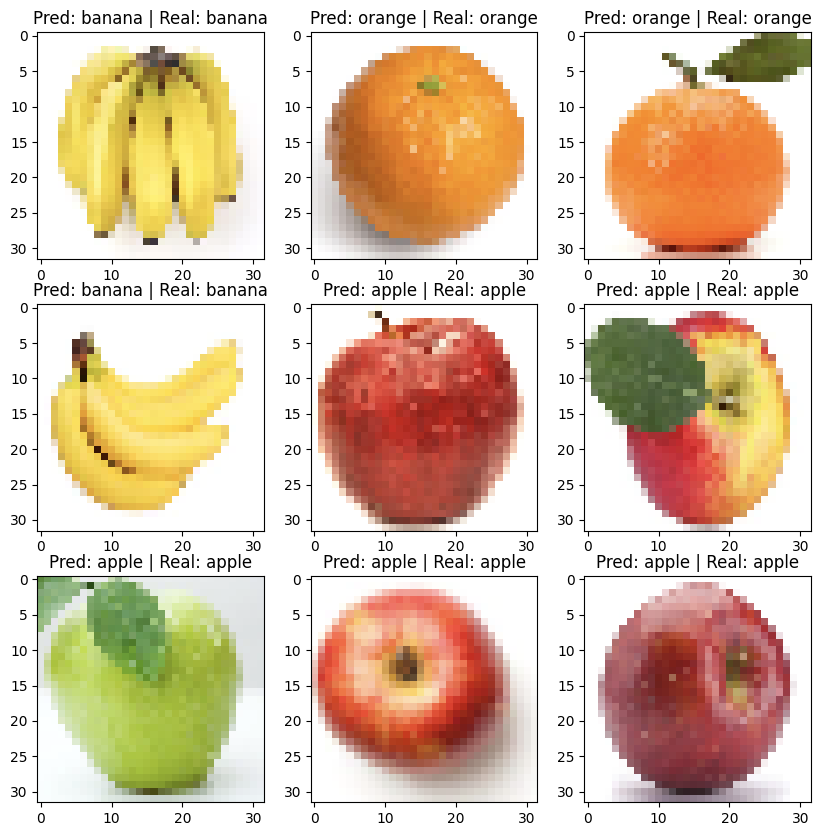

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpeuuao5ue'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135607595525968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595530192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595530384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595531344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595530960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595531920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595530768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135607595531536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135606883500112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135606883501648: TensorSpec(shape=(), dtype=tf.resource, name=None)
